In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

### Helpers

#### Mapping Color

In [ ]:
# Mapping function that takes the data and the column name as input and returns a dictionary with the data and the column name as key and value respectively

def map_color(data):
    # Mapping the number to a color from the ColorLabels file 
    df_color = pd.read_csv('labels/ColorLabels.csv')
    df_color = df_color.set_index('ColorID')
    # if the value is 0 then put "not available" as the color
    # for all values at location 0, the data is not available
    # copy the data
    data = data.copy()
    data[data == 0] = 'Nan'
    # for all other values, map the color from the ColorLabels file 
    data[ data != 'Nan'] = df_color.loc[data[ data != 'Nan']].ColorName.values
    return data


#### Mapping Breed

In [ ]:
# Mapping function that takes the data and the column name as input and returns a dictionary with the data and the column name as key and value respectively

def map_breed(data):
    # Mapping the number to a breed from the BreedLabels file 
    df_breed = pd.read_csv('labels/BreedLabels.csv')
    df_breed = df_breed.set_index('BreedID')
    # if the value is 0 then put "not available" as the breed
    # for all values at location 0, the data is not available
    # copy the data
    data = data.copy()
    data[data == 0] = 'Nan'
    # for all other values, map the breed from the BreedLabels file 
    data[ data != 'Nan'] = df_breed.loc[data[ data != 'Nan']].BreedName.values
    return data


#### Mapping States

In [ ]:
# Mapping function that takes the data and the column name as input and returns a dictionary with the data and the column name as key and value respectively

def map_state(data):
    # Mapping the number to a breed from the StateLabels file 
    df_state = pd.read_csv('labels/StateLabels.csv')
    df_state = df_state.set_index('StateID')
    # if the value is 0 then put "not available" as the State
    # for all values at location 0, the data is not available
    # copy the data
    data = data.copy()
    data[data == 0] = 'Nan'
    # for all other values, map the state from the StateLabels file 
    data[ data != 'Nan'] = df_state.loc[data[ data != 'Nan']].StateName.values
    return data


#### Description Summary

In [ ]:
# Create a word cloud to visualize the most common words used in pet descriptions. This can help identify which words are most strongly associated with pets that are adopted quickly.

def word_cloud(data):
    # Create a list of descriptions
    text = data.values
    # Create a list of stopwords
    stopwords = set(STOPWORDS)
    # Create a word cloud as list of words and their frequency
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(text))
    # return list of words and their frequency
    return wordcloud.words_ 

In [ ]:
# read the data
df = pd.read_csv('train_balanced_log_corr_drop.csv')

# show all columns names
print(df.columns)

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'Description', 'AdoptionSpeed'],
      dtype='object')


### Most Frequent Values in all columns
### Visualize after preprocessing

<ipython-input-27-03aa612996ec>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-27-03aa612996ec>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-27-03aa612996ec>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-27-03aa612996ec>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-27-03aa612996ec>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-27-03aa612996ec>:164: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=9

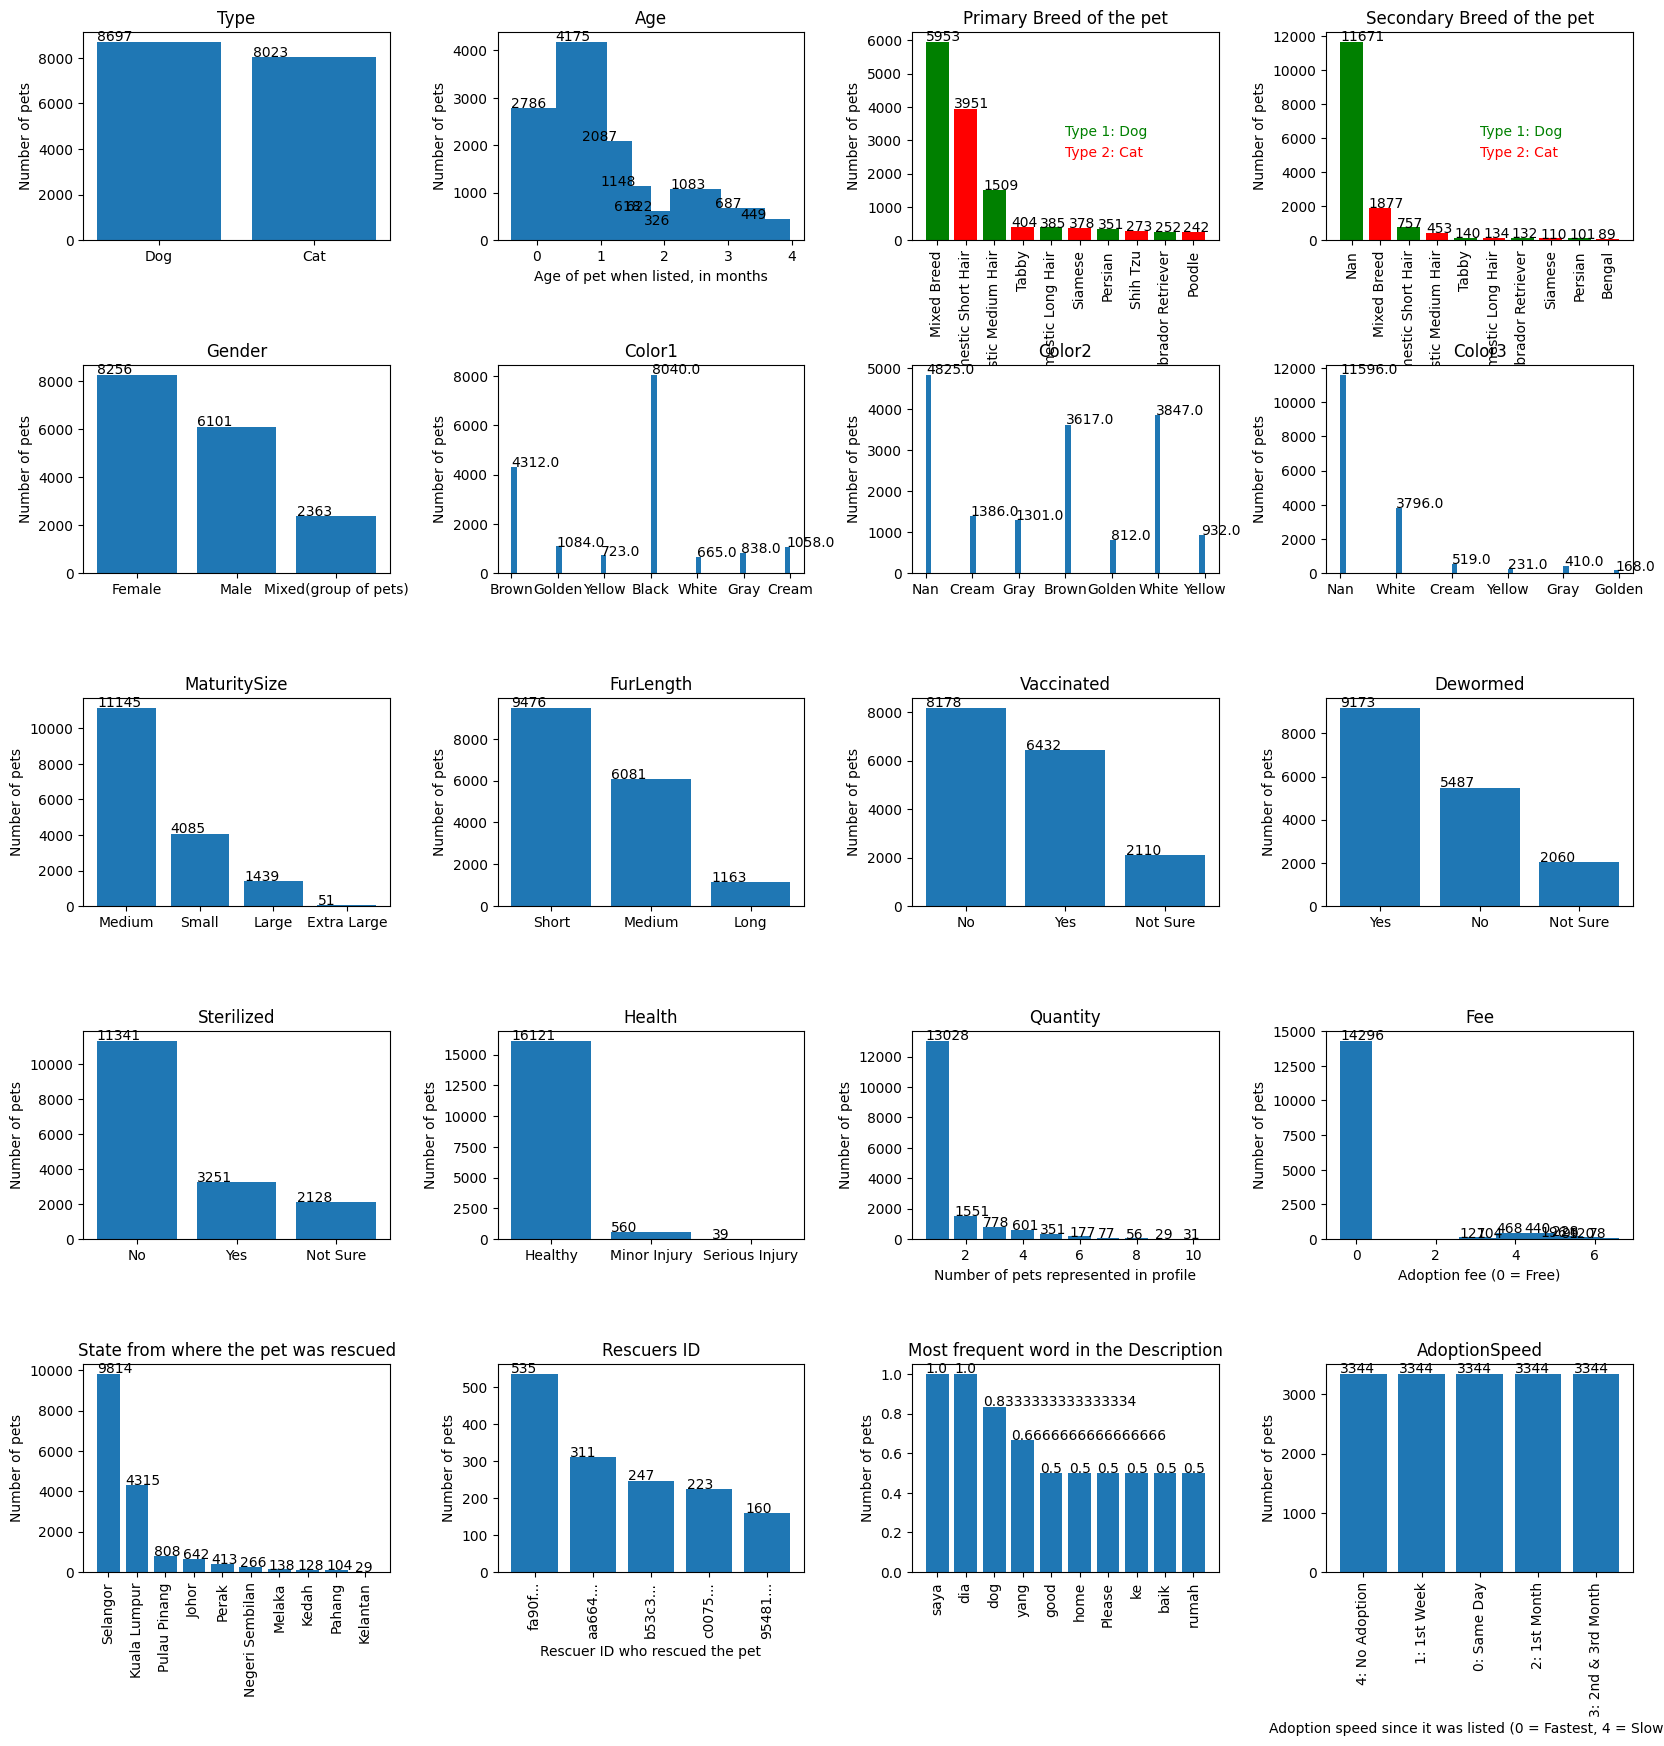

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# change width and height between each figure 
plt.subplots_adjust(wspace=0.35, hspace=0.6)

# plot the distribution of each column with its name as the title and map the data if needed 
for column, ax in zip(df.columns, axes.flatten()):
    if column == 'Color'+str(1) or column == 'Color'+str(2) or column == 'Color'+str(3):
        # map the x-axis data
        x = map_color(df[column])
        ax.hist(x, bins=50)
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'Breed'+str(1) or column == 'Breed'+str(2):
        # map the x-axis data
        x = map_breed(df[column])
        # plot x values for the highest 10 frequencies
        # make the bar plot green for type = 1 and yellow for type = 2
        ax.bar(x.value_counts().index[:10], x.value_counts().values[:10], color=['green', 'red'])
        
        # write the type of the pet on the top of the bar according to the color
        ax.text(0.5, 0.5, 'Type 1: Dog', color='green', transform=ax.transAxes)
        ax.text(0.5, 0.4, 'Type 2: Cat', color='red', transform=ax.transAxes)

        # set the title for the first subplot
        if column == 'Breed'+str(1):
            ax.set_title("Primary Breed of the pet")
        else:
            ax.set_title("Secondary Breed of the pet")
        # rotate the x-labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    elif column == 'State':
        # map the x-axis data
        x = map_state(df[column])
        # plot x values for the highest 10 frequencies
        ax.bar(x.value_counts().index[:10], x.value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title("State from where the pet was rescued")
        # rotate the x-labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    elif column == 'RescuerID':
        # print on x-axis the first 5 letters of the rescuer id, and on y-axis the number of pets rescued
        ax.set_xlabel('Rescuer ID who rescued the pet')
        # show the 5 most frequent rescuers
        # write the first 5 letters of the rescuer id
        df[column] = df[column].str[:5] + '...'
        ax.bar(df[column].value_counts().index[:5], df[column].value_counts().values[:5])
        # set the title for the first subplot
        ax.set_title('Rescuers ID')
        # rotate the x-labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    elif column == 'Description':
         # Frequent words in the description
        data = word_cloud(df[column])
        # plot the first 10 words
        ax.bar(list(data.keys())[:10], list(data.values())[:10])
        # set the title for the first subplot
        ax.set_title('Most frequent word in the Description')
        # rotate the x-labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    elif column == 'Gender':
        #  map Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
        df[column] = df[column].map({1: 'Male', 2: 'Female', 3: 'Mixed(group of pets)'})
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'Type':
        # map its values to dog or cat
        df[column] = df[column].map({1: 'Dog', 2: 'Cat'})
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'Age':
        # print on x-axis "the age in months" 
        ax.set_xlabel('Age of pet when listed, in months')
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'MaturitySize':
        # map its values to small, medium, large, extra large or not specified
        df[column] = df[column].map({1: 'Small', 2: 'Medium', 3: 'Large', 4: 'Extra Large', 0: 'Not Specified'})
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'FurLength':
        # map its values to short, medium, long or not specified
        df[column] = df[column].map({1: 'Short', 2: 'Medium', 3: 'Long', 0: 'Not Specified'})
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'Vaccinated' or column == 'Dewormed' or column == 'Sterilized':
        # map its values to yes, no, not sure or not specified
        df[column] = df[column].map({1: 'Yes', 2: 'No', 3: 'Not Sure', 0: 'Not Specified'})
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'Health':
        # Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
        # map its values to healthy, minor injury, serious injury or not specified
        df[column] = df[column].map({1: 'Healthy', 2: 'Minor Injury', 3: 'Serious Injury', 0: 'Not Specified'})
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'Quantity':
        # print on x-axis "Number of pets represented in profile"
        ax.set_xlabel('Number of pets represented in profile')
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'Fee':
        # Adoption fee (0 = Free)
        # print on x-axis "Adoption fee"
        ax.set_xlabel('Adoption fee (0 = Free)')
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == "AdoptionSpeed" :
        # print on x-axis "Adoption speed since it was listed (0 = Fastest, 4 = Slowest)"
        ax.set_xlabel('Adoption speed since it was listed (0 = Fastest, 4 = Slowest)')
        # 0 - Pet was adopted on the same day as it was listed.
        # 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
        # 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
        # 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
        # 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).
        df[column] = df[column].map({0: '0: Same Day', 1: '1: 1st Week', 2: '2: 1st Month', 3: '3: 2nd & 3rd Month', 4: '4: No Adoption'})
        # show values of x-axis in the order of the index 0 then 1 then 2 then 3 then 4
        ax.bar(df[column].value_counts().index[[0, 1, 2, 3, 4]], df[column].value_counts().values[[0, 1, 2, 3, 4]])
        # set the title for the first subplot
        ax.set_title(column)
        # rotate the x-labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # put the value of the frequency on top of each bar
    for p in ax.patches:
        # exclude the height = 0
        if p.get_height() != 0:
            ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    # set y-axis label for the first subplot
    ax.set_ylabel('Number of pets')
# Show the plot
plt.show()

### Visualize before preprocessing 

## In the histogram of Adoption Speed, it shows the actual distribution, where 

In [ ]:
# read the data
df = pd.read_csv('train.csv')

<ipython-input-68-501866929090>:170: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-68-501866929090>:170: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-68-501866929090>:170: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-68-501866929090>:170: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-68-501866929090>:170: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-68-501866929090>:170: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotat

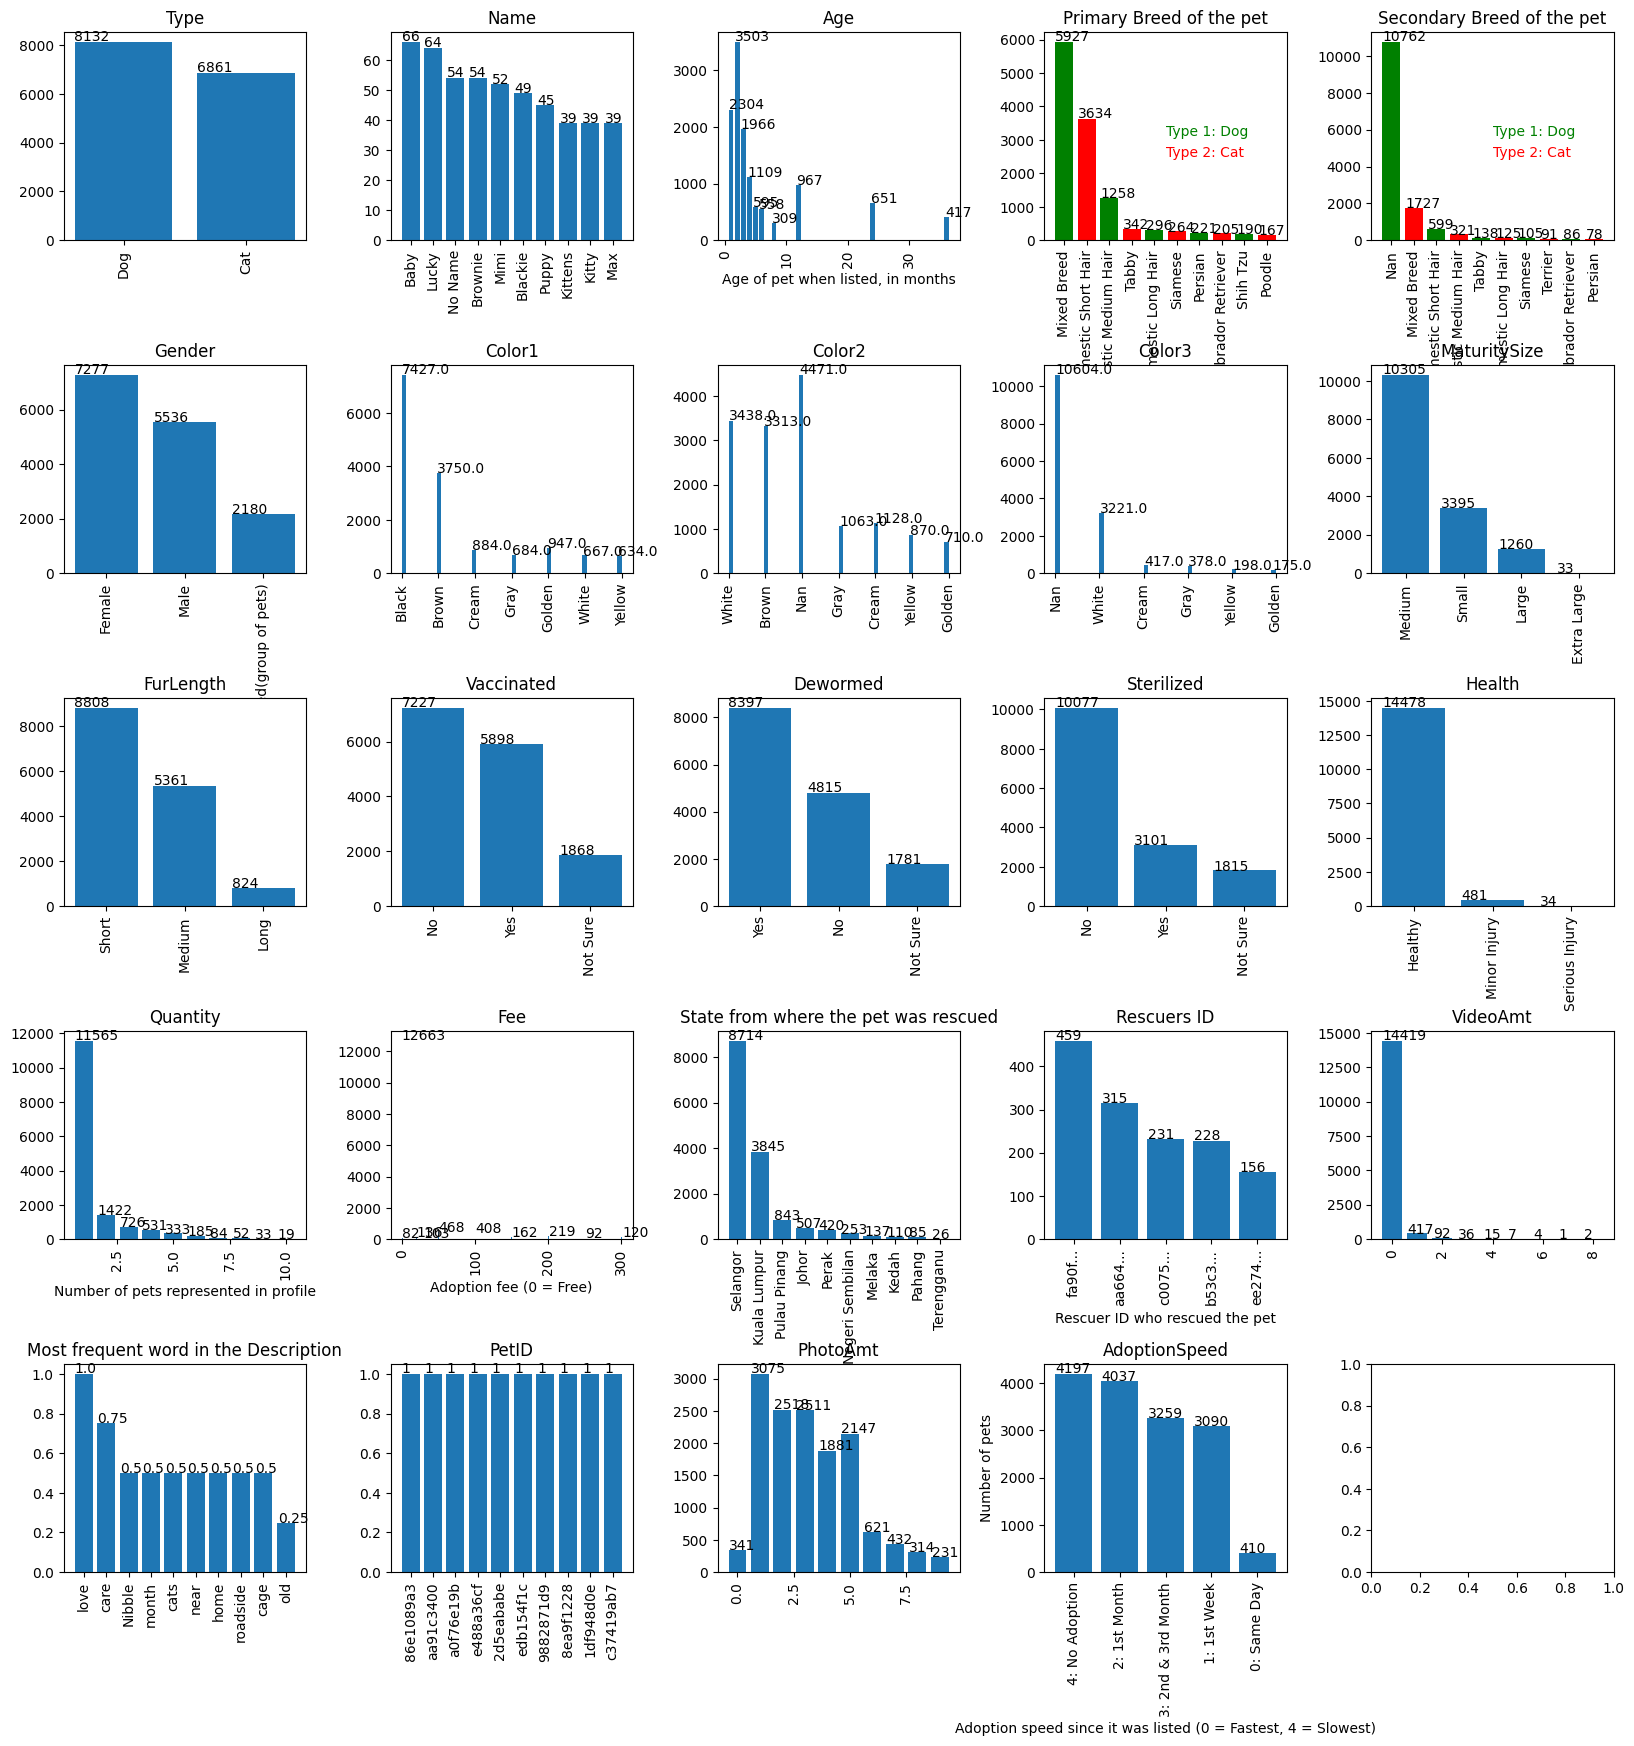

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# change width and height between each figure 
plt.subplots_adjust(wspace=0.35, hspace=0.6)

# plot the distribution of each column with its name as the title and map the data if needed 
for column, ax in zip(df.columns, axes.flatten()):
    if column == 'Color'+str(1) or column == 'Color'+str(2) or column == 'Color'+str(3):
        # map the x-axis data
        x = map_color(df[column])
        ax.hist(x, bins=50)
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'Breed'+str(1) or column == 'Breed'+str(2):
        # map the x-axis data
        x = map_breed(df[column])
        # plot x values for the highest 10 frequencies
        # make the bar plot green for type = 1 and yellow for type = 2
        ax.bar(x.value_counts().index[:10], x.value_counts().values[:10], color=['green', 'red'])
        
        # write the type of the pet on the top of the bar according to the color
        ax.text(0.5, 0.5, 'Type 1: Dog', color='green', transform=ax.transAxes)
        ax.text(0.5, 0.4, 'Type 2: Cat', color='red', transform=ax.transAxes)

        # set the title for the first subplot
        if column == 'Breed'+str(1):
            ax.set_title("Primary Breed of the pet")
        else:
            ax.set_title("Secondary Breed of the pet")

    elif column == 'State':
        # map the x-axis data
        x = map_state(df[column])
        # plot x values for the highest 10 frequencies
        ax.bar(x.value_counts().index[:10], x.value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title("State from where the pet was rescued")

    elif column == 'RescuerID':
        # print on x-axis the first 5 letters of the rescuer id, and on y-axis the number of pets rescued
        ax.set_xlabel('Rescuer ID who rescued the pet')
        # show the 5 most frequent rescuers
        # write the first 5 letters of the rescuer id
        df[column] = df[column].str[:5] + '...'
        ax.bar(df[column].value_counts().index[:5], df[column].value_counts().values[:5])
        # set the title for the first subplot
        ax.set_title('Rescuers ID')
    
    elif column == 'Description':
         # Frequent words in the description
        data = word_cloud(df[column])
        # plot the first 10 words
        ax.bar(list(data.keys())[:10], list(data.values())[:10])
        # set the title for the first subplot
        ax.set_title('Most frequent word in the Description')

    elif column == 'Gender':
        #  map Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
        df[column] = df[column].map({1: 'Male', 2: 'Female', 3: 'Mixed(group of pets)'})
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'Type':
        # map its values to dog or cat
        df[column] = df[column].map({1: 'Dog', 2: 'Cat'})
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'Age':
        # print on x-axis "the age in months" 
        ax.set_xlabel('Age of pet when listed, in months')
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'MaturitySize':
        # map its values to small, medium, large, extra large or not specified
        df[column] = df[column].map({1: 'Small', 2: 'Medium', 3: 'Large', 4: 'Extra Large', 0: 'Not Specified'})
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'FurLength':
        # map its values to short, medium, long or not specified
        df[column] = df[column].map({1: 'Short', 2: 'Medium', 3: 'Long', 0: 'Not Specified'})
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'Vaccinated' or column == 'Dewormed' or column == 'Sterilized':
        # map its values to yes, no, not sure or not specified
        df[column] = df[column].map({1: 'Yes', 2: 'No', 3: 'Not Sure', 0: 'Not Specified'})
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'Health':
        # Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
        # map its values to healthy, minor injury, serious injury or not specified
        df[column] = df[column].map({1: 'Healthy', 2: 'Minor Injury', 3: 'Serious Injury', 0: 'Not Specified'})
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'Quantity':
        # print on x-axis "Number of pets represented in profile"
        ax.set_xlabel('Number of pets represented in profile')
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == 'Fee':
        # Adoption fee (0 = Free)
        # print on x-axis "Adoption fee"
        ax.set_xlabel('Adoption fee (0 = Free)')
        # plot x values for the highest 10 frequencies
        # ax.hist(df[column], bins=50)
        ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
        # set the title for the first subplot
        ax.set_title(column)

    elif column == "AdoptionSpeed" :
        # print on x-axis "Adoption speed since it was listed (0 = Fastest, 4 = Slowest)"
        ax.set_xlabel('Adoption speed since it was listed (0 = Fastest, 4 = Slowest)')
        # 0 - Pet was adopted on the same day as it was listed.
        # 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
        # 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
        # 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
        # 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).
        df[column] = df[column].map({0: '0: Same Day', 1: '1: 1st Week', 2: '2: 1st Month', 3: '3: 2nd & 3rd Month', 4: '4: No Adoption'})
        # show values of x-axis in the order of the index 0 then 1 then 2 then 3 then 4
        ax.bar(df[column].value_counts().index[[0, 1, 2, 3, 4]], df[column].value_counts().values[[0, 1, 2, 3, 4]])
        # set the title for the first subplot
        ax.set_title(column)
        
    else:
      # plot x values for the highest 10 frequencies
      # ax.hist(df[column], bins=50)
      ax.bar(df[column].value_counts().index[:10], df[column].value_counts().values[:10])
      # set the title for the first subplot
      ax.set_title(column)

    # put the value of the frequency on top of each bar
    for p in ax.patches:
        # exclude the height = 0
        if p.get_height() != 0:
            ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    # rotate the x-labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# set y-axis label for the first subplot
ax.set_ylabel('Number of pets')
# Show the plot
plt.show()

### Visualize for each dog and cats, each with different colors

In [ ]:
def plot_each_type(data, dog_data, cat_data, width=0.35):
    # Loop through each column in the dataset
    fig, axes = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(20, 5))
    for i, col in enumerate(data.columns):
        # Get the unique values from the column
        values = data[col].unique()[:10]  # Get the first 10 unique values
        value_names = [None] * len(values)
        # Plot the histograms for each value
        ax = axes[i]
        for j, value in enumerate(values):
            dog_counts = dog_data[dog_data[col] == value][col].count()
            cat_counts = cat_data[cat_data[col] == value][col].count()
            ax.bar(j-width/2, dog_counts, width=width, label="Dog")
            ax.bar(j+width/2, cat_counts, width=width, label="Cat")
            value_name = value
            # Map the value to its name and print it on the x-axis
            if col == "Type":
                value_name = "Dog" if value == 1 else "Cat"
            elif col == "Gender":
                if value == 1:
                    value_name = "Male"  
                elif value == 2:
                    value_name = "Female"
                else:
                    value_name = "Mixed"
            elif col == "MaturitySize":
                if value == 1:
                    value_name = "Small"
                elif value == 2:
                    value_name = "Medium"
                elif value == 3:
                    value_name = "Large"
                elif value == 4:
                    value_name = "Extra Large"
                else:
                    value_name = "Not Specified"
            elif col == "FurLength":
                if value == 1:
                    value_name = "Short"
                elif value == 2:
                    value_name = "Medium"
                elif value == 3:
                    value_name = "Long"
                else:
                    value_name = "Not Specified"
            elif col == "Vaccinated" or col == "Dewormed" or col == "Sterilized":
                if value == 1:
                    value_name = "Yes"
                elif value == 2:
                    value_name = "No"
                else:
                    value_name = "Not Sure"
            elif col == "Health":
                if value == 1:
                    value_name = "Healthy"
                elif value == 2:
                    value_name = "Minor Injury"
                elif value == 3:
                    value_name = "Serious Injury"
                else:
                    value_name = "Not Specified"
            elif col == "Breed1" or col == "Breed2":
                df_label = pd.read_csv(f'labels/BreedLabels.csv')
                if value == 0:
                    value_name = "No Breed"
                else:
                    value_name = df_label[df_label[f"BreedID"] == value][f"BreedName"].values[0]
            elif col == "Color1" or col == "Color2" or col == "Color3":
                df_label = pd.read_csv(f'labels/ColorLabels.csv')
                if value == 0:
                    value_name = "No Color"
                else:
                    value_name = df_label[df_label[f"ColorID"] == value][f"ColorName"].values[0]
            elif col == "State":
                df_label = pd.read_csv(f'labels/StateLabels.csv')
                value_name = df_label[df_label[f"{col}ID"] == value][f"{col}Name"].values[0]
            elif col == "AdoptionSpeed":
                if value == 0:
                    value_name = "Adopted on the same day"
                elif value == 1:
                    value_name = "Adopted within 1 week"
                elif value == 2:
                    value_name = "Adopted within 1 month"
                elif value == 3:
                    value_name = "Adopted within 2-3 months"
                else:
                    value_name = "Not Adopted"
            # Append value name to the list
            value_names[j] = value_name
        # Put the value of the frequency on top of each bar
        for p in ax.patches:
            if p.get_height() != 0:
                ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
        ax.set_title(col)
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(value_names)
        # rotate the x-labels for better visibility
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        # ax.legend()
    plt.tight_layout()
    plt.show()

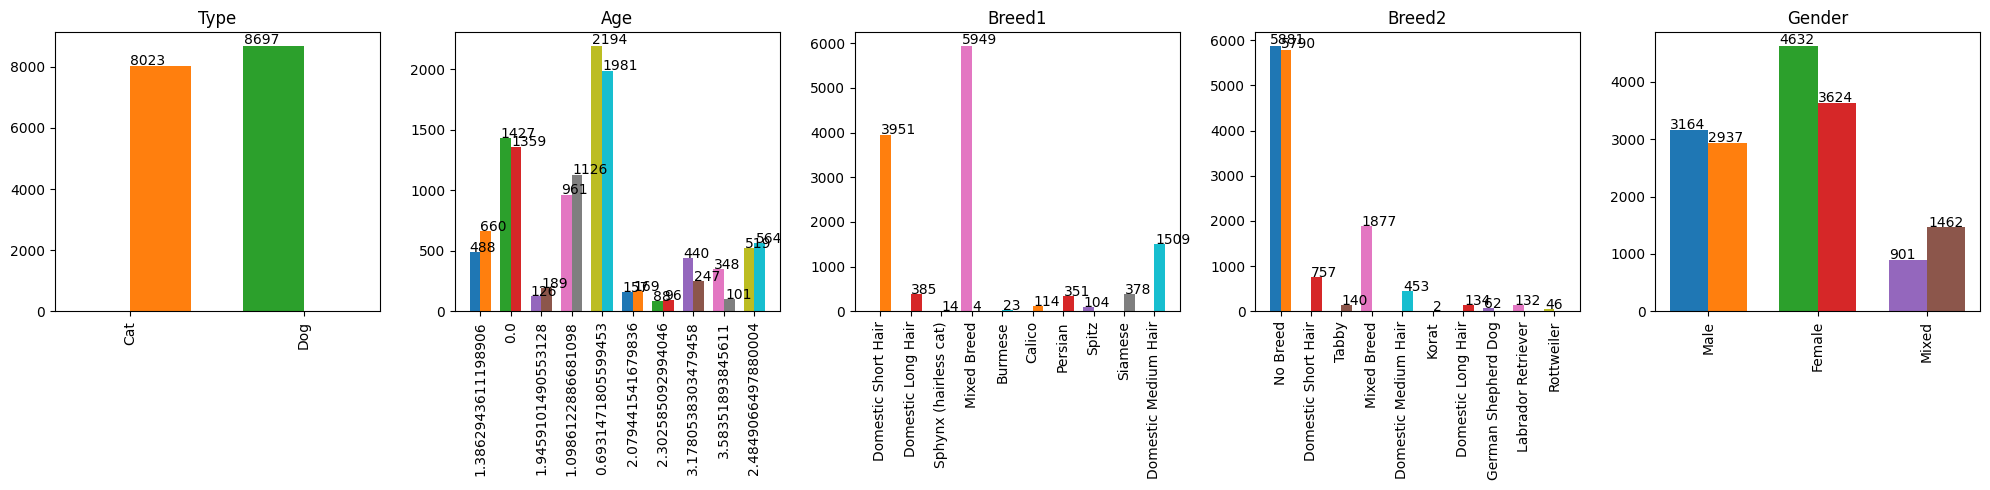

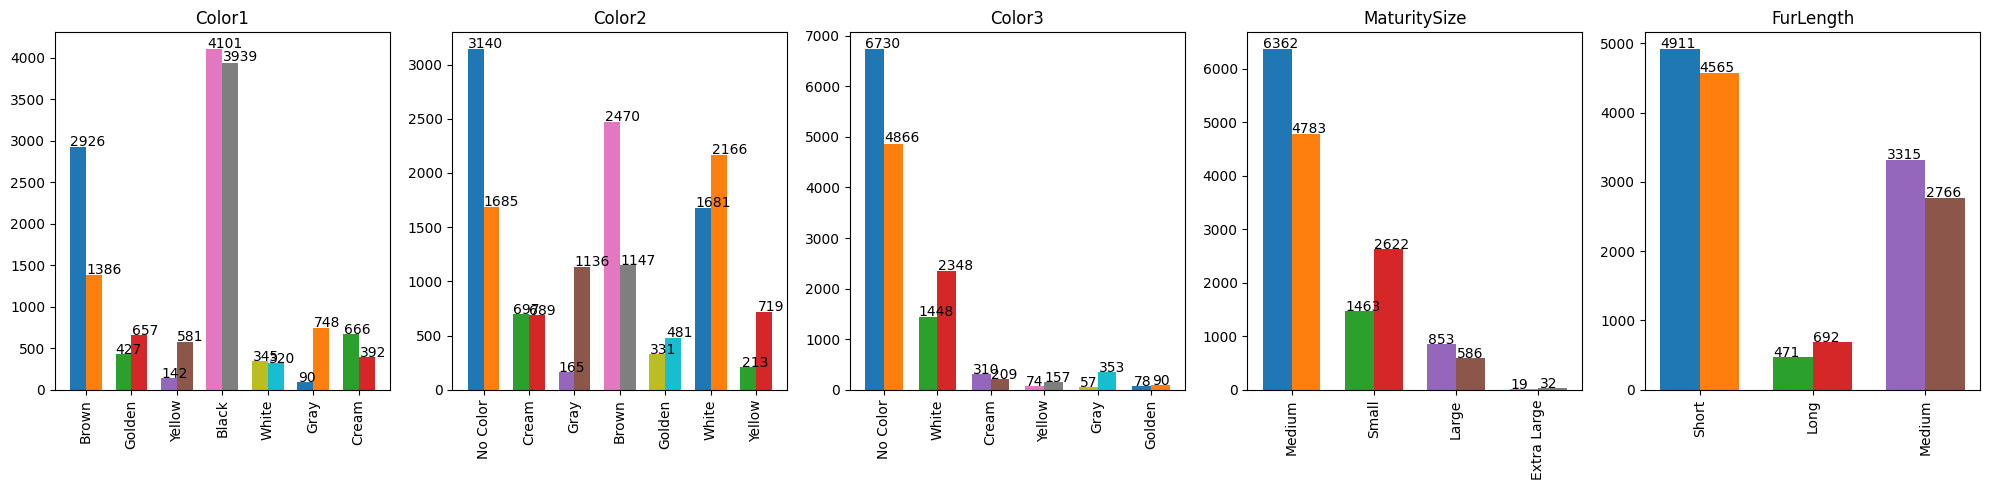

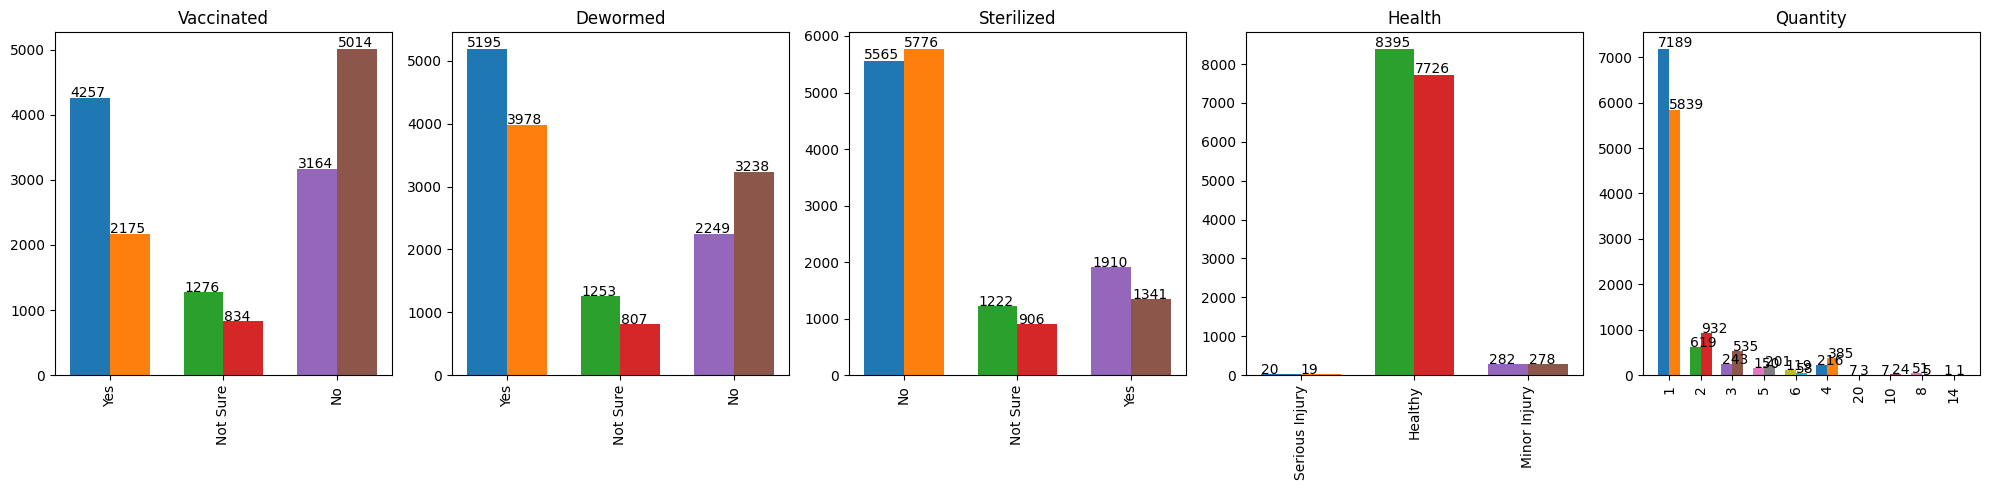

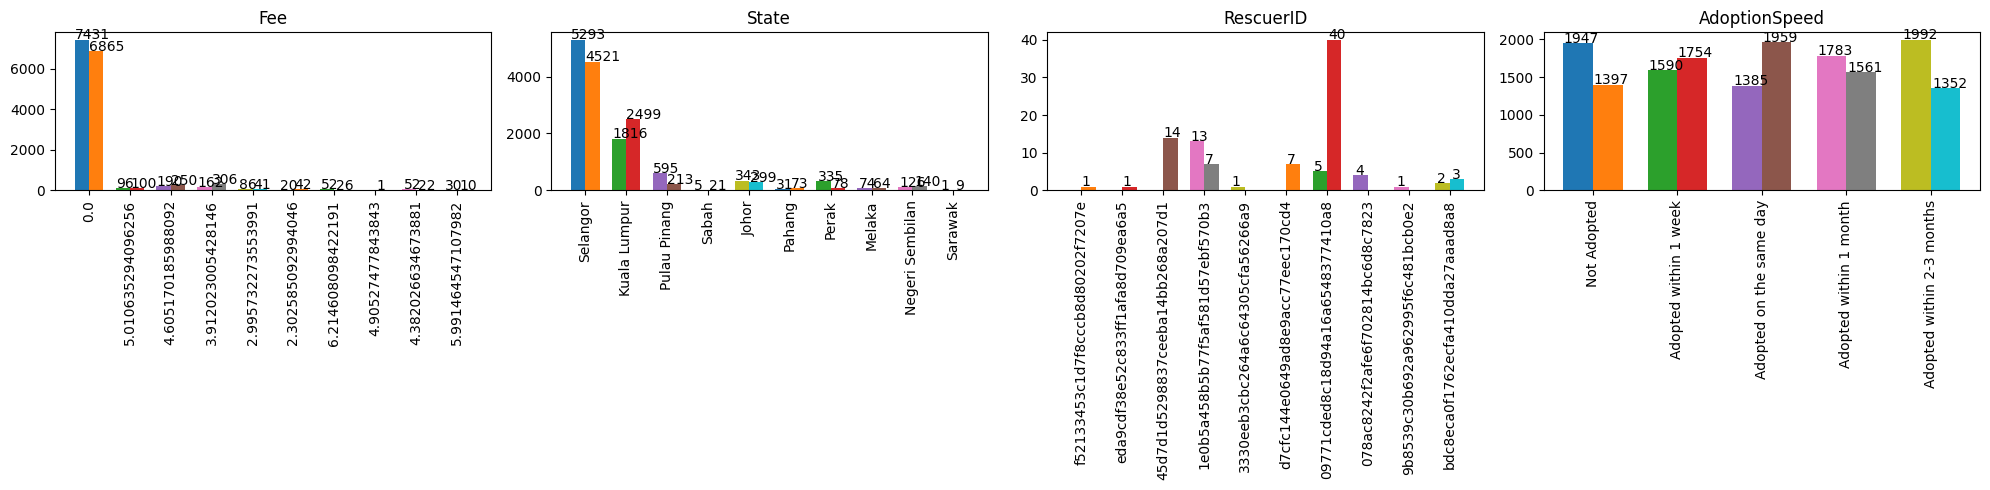

In [ ]:
# Load the data
data = pd.read_csv("train_balanced_log_corr_drop.csv")
data = data.drop(columns=['Description'])

# Split the data into dog and cat datasets
dog_data = data[data["Type"] == 1]  # Type 1 is dogs
cat_data = data[data["Type"] == 2]  # Type 2 is cats

# Truncate the columns in a loop each 5 columns 
# to avoid the error of too many columns
for i in range(0, len(data.columns), 5):
    plot_each_type(data.iloc[:, i:i+5], dog_data, cat_data)


# Questions
###  Is there a significant difference in the adoption speed between dogs and cats in the dataset
--> Yes, on average the number of non-adopted dogs are greater than the number of non-adopted cats. And the average adoption speed of cats is faster than the average speed of dogs.




In [ ]:
# Load the data
data = pd.read_csv("train_balanced_log_corr_drop.csv")
data = data.drop(columns=['Description'])

# Split the data into dog and cat datasets
dog_data = data[data["Type"] == 1]  # Type 1 is dogs
cat_data = data[data["Type"] == 2]  # Type 2 is cats

# Select only the adoption speed column
dog_data = dog_data["AdoptionSpeed"]
cat_data = cat_data["AdoptionSpeed"]

# Truncate the columns in a loop each 5 columns 
# to avoid the error of too many columns
for i in range(0, len(data.columns), 5):
    plot_each_type(data.iloc[:, i:i+5], dog_data, cat_data)


: 

### Get the 2 first rescuers id

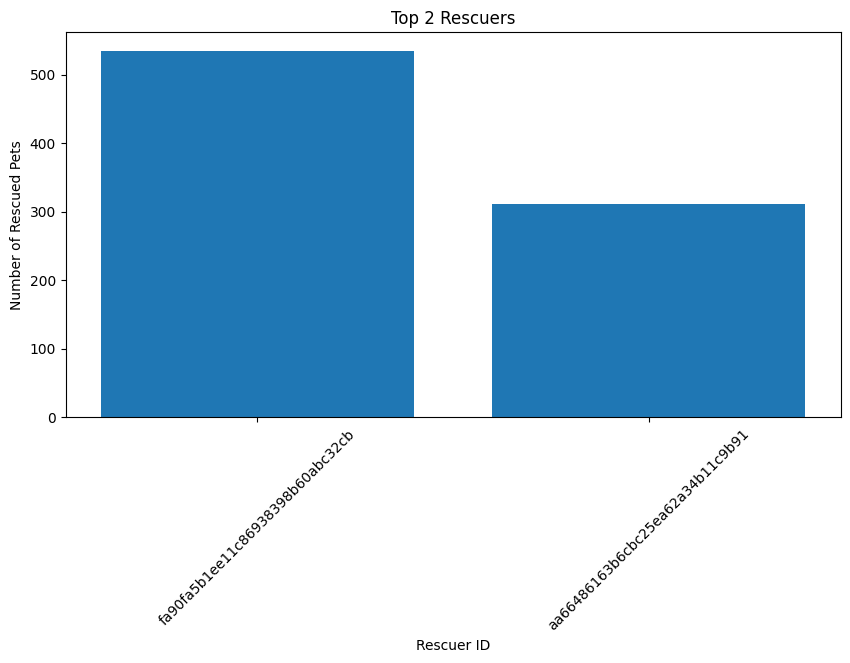

In [ ]:
# Load the data
data = pd.read_csv("train_balanced_log_corr_drop.csv")

# Group the data by rescuer id and get the count
rescuer_count = data.groupby("RescuerID").count()["Type"]
# Sort the count in descending order
rescuer_count = rescuer_count.sort_values(ascending=False)
# Get the top 2 rescuers
top_rescuers = rescuer_count.head(2)

# visualize the result
plt.figure(figsize=(10, 5))
plt.bar(top_rescuers.index, top_rescuers.values)
plt.title("Top 2 Rescuers")
plt.xlabel("Rescuer ID")
plt.ylabel("Number of Rescued Pets")
# rotate the x-labels for better visibility
plt.xticks(rotation=45)
plt.show()

### Use Map reduce to get the first 2 rescuers id 

In [19]:
# ! pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.functions import desc
from pyspark.sql.functions import sum

# Create a SparkSession
spark = SparkSession.builder.appName("PetRescue").getOrCreate()

# Read the CSV file into a DataFrame using Spark
df = spark.read.csv("train_balanced_log_corr_drop.csv", header=True)

# Group the data by the rescuer ID and count the number of pets each rescuer has rescued
rescuers = df.groupBy("RescuerID").agg(sum("AdoptionSpeed").alias("PetCount"))

# Sort the rescuers by the number of pets they have rescued in descending order
sorted_rescuers = rescuers.sort(desc("PetCount"))

# Get the first 2 rescuers with the highest pet count
top_rescuers = sorted_rescuers.select("RescuerID").limit(2).rdd.flatMap(lambda x: x).collect()

print(top_rescuers)

['fa90fa5b1ee11c86938398b60abc32cb', 'aa66486163b6cbc25ea62a34b11c9b91']


### Show the boxplots of each column
### Boxplot before preprocessing

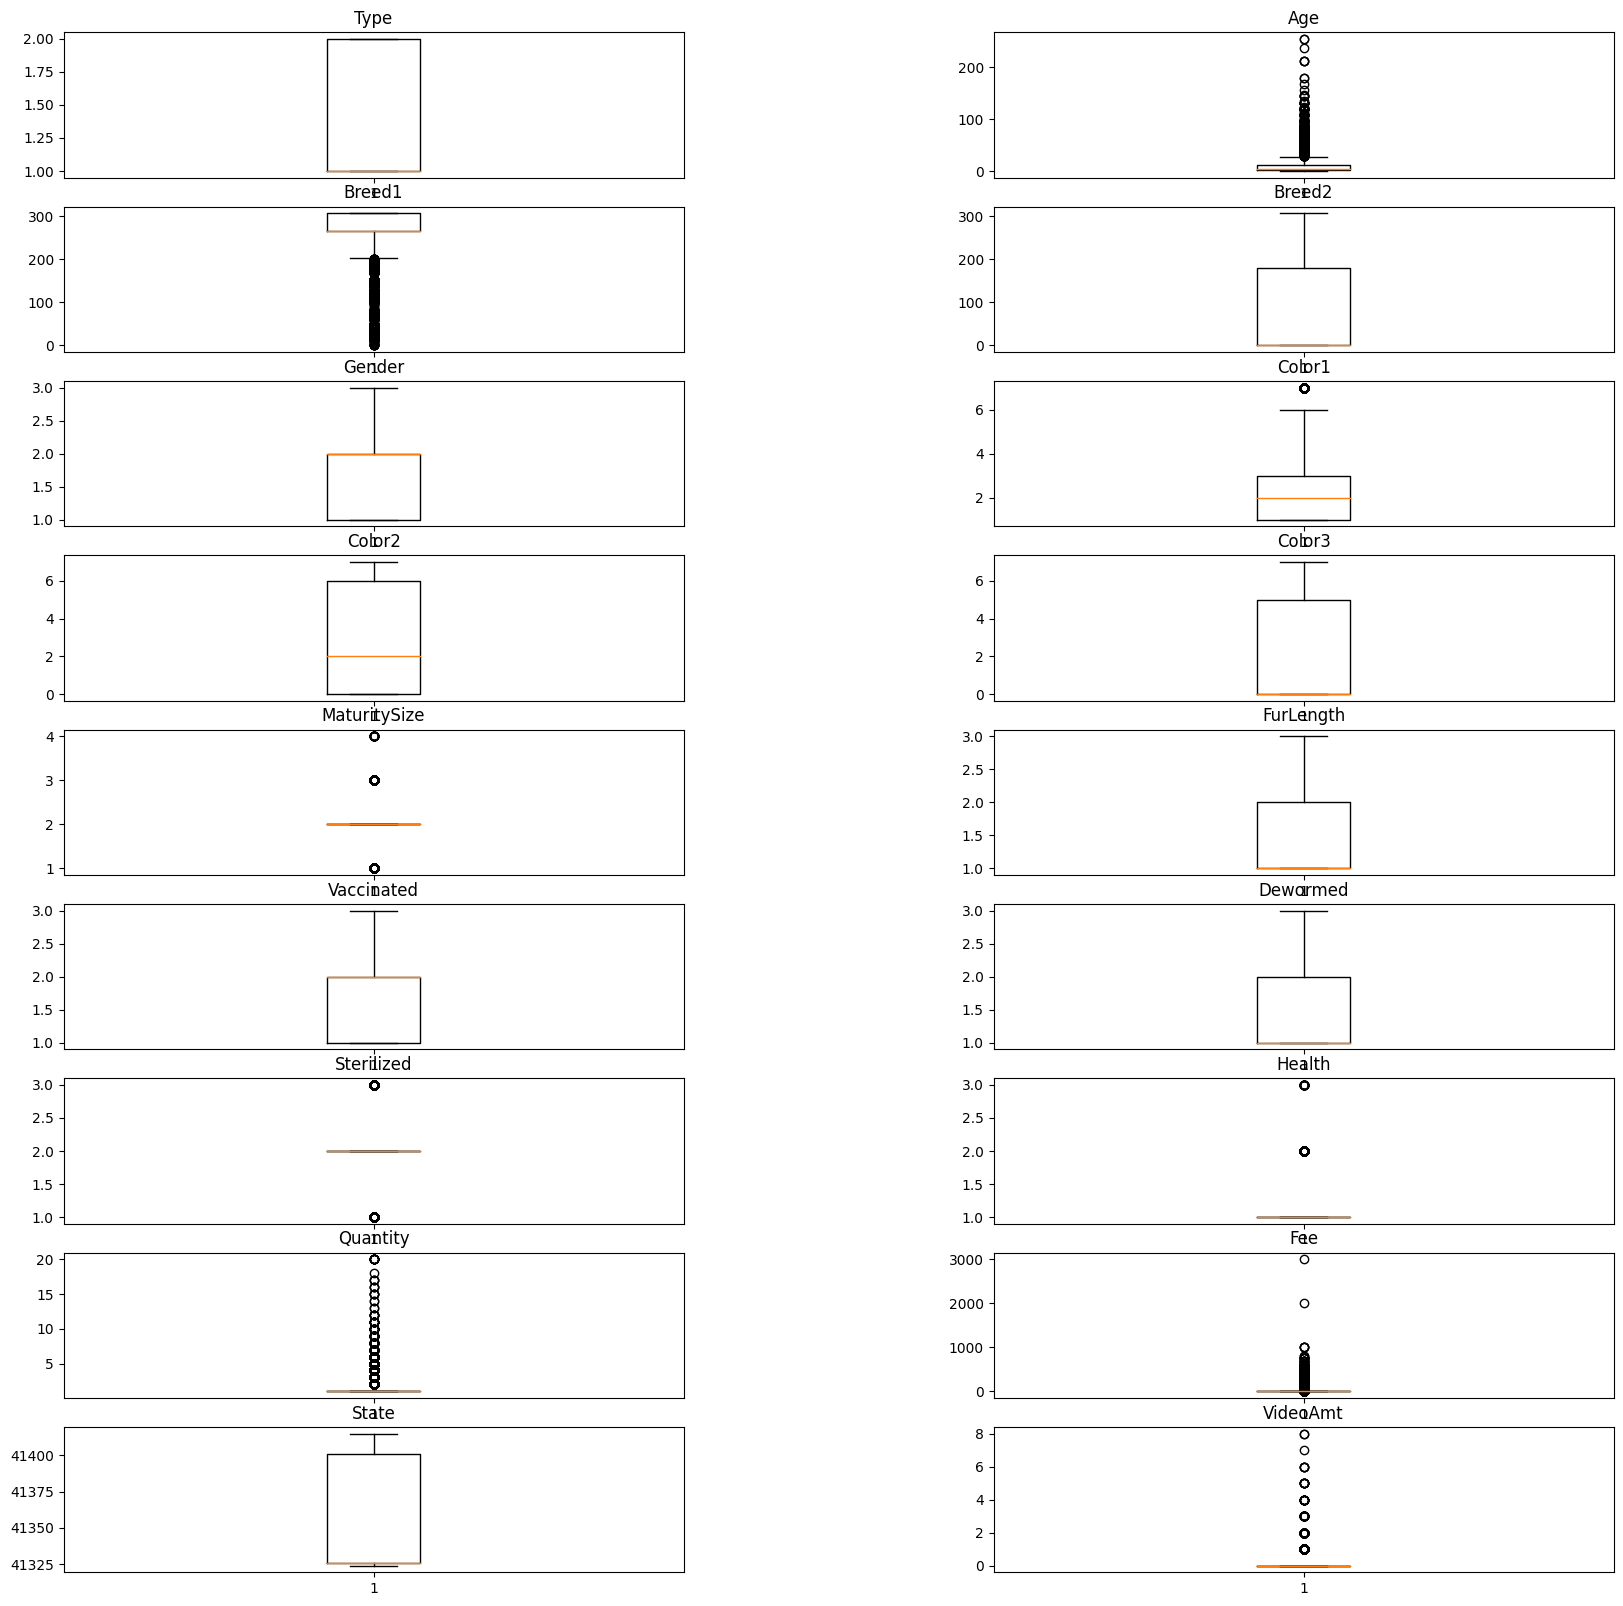

In [ ]:
# Load the dataset
df = pd.read_csv('train.csv')

# Define the list of columns to plot
# drop the columns that are not numeric
df = df.drop(columns=['Name', 'RescuerID', 'Description', 'AdoptionSpeed'])
columns = df.columns 

# Create a figure with subplots
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(20, 20))

# Iterate through the columns and plot the boxplots
for col, ax in zip(columns, axes.flatten()):
    ax.boxplot(df[col])
    ax.set_title(col)

# Adjust the layout and show the plot
fig.subplots_adjust(wspace=0.5)
plt.show()

### Boxplot after preprocessing

In [ ]:
# Load the dataset
df = pd.read_csv('train.csv')

# Define the list of columns to plot
# drop the columns that are not numeric
df = df.drop(columns=['Name', 'RescuerID', 'Description', 'AdoptionSpeed'])
columns = df.columns 

# Create a figure with subplots
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(20, 20))

# Iterate through the columns and plot the boxplots
for col, ax in zip(columns, axes.flatten()):
    ax.boxplot(df[col])
    ax.set_title(col)

# Adjust the layout and show the plot
fig.subplots_adjust(wspace=0.5)
plt.show()

### Show correlation between all columns and the target column

<ipython-input-74-ceeb406353de>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()['AdoptionSpeed'].sort_values()


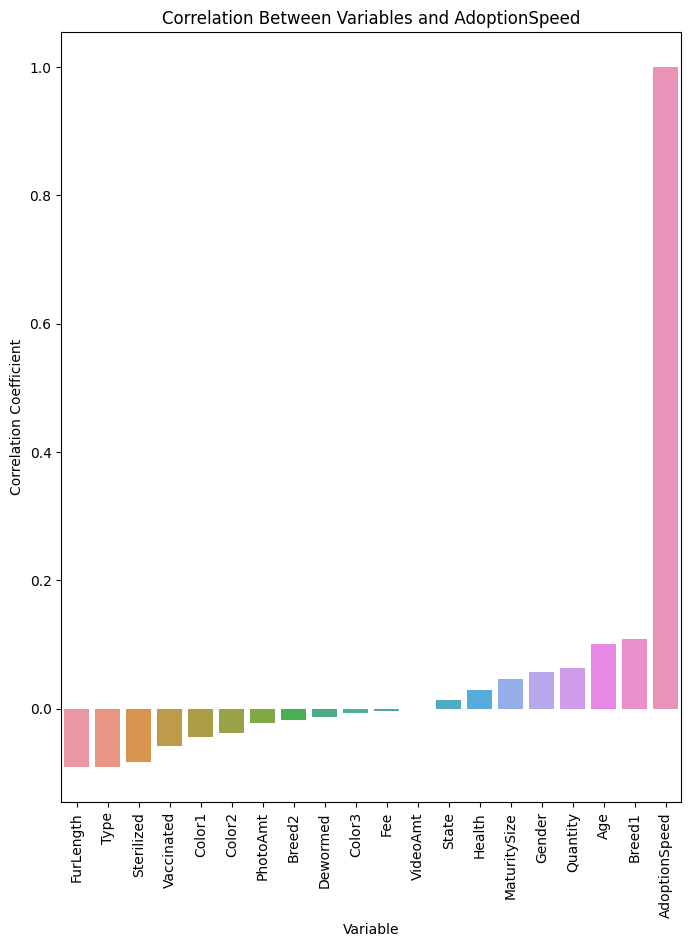

<ipython-input-74-ceeb406353de>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


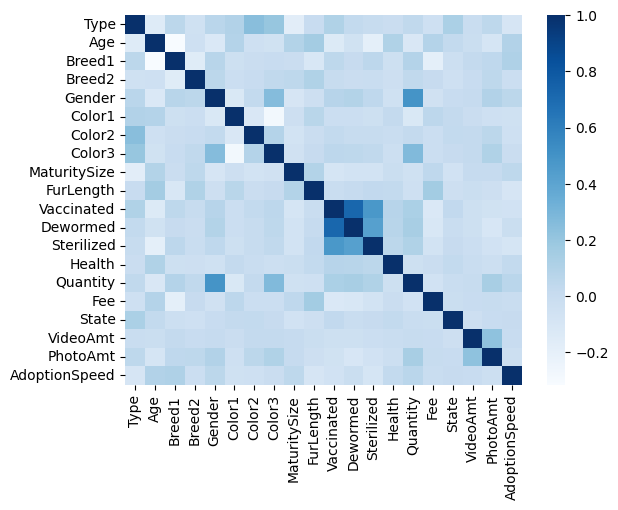

In [ ]:
# Correlation between features and target variable (AdoptionSpeed) can be used to select the most important features that have the highest correlation with the target variable 
# and remove the features that have low correlation with the target variable to reduce the dimensionality of the dataset and improve the model's performance 

# read the data
df = pd.read_csv('train.csv')

# Calculate the correlation coefficient between each variable and the target variable
corr = df.corr()['AdoptionSpeed'].sort_values()

# Visualize the correlation coefficients
plt.figure(figsize=(8, 10))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Between Variables and AdoptionSpeed')
plt.show()

# show correlation matrix
corr_matrix = df.corr() 
sns.heatmap(corr_matrix, cmap='Blues')
plt.show()

# correlation values:
# above 0: positive correlation (as one feature increases, the other feature increases)
# below 0: negative correlation (as one feature increases, the other feature decreases)
# 0: no correlation (as one feature increases, the other feature does not change)

In [ ]:
# Correlation between features and target variable (AdoptionSpeed) can be used to select the most important features that have the highest correlation with the target variable 
# and remove the features that have low correlation with the target variable to reduce the dimensionality of the dataset and improve the model's performance 

# read the data
df = pd.read_csv('train_balanced_log_corr_drop.csv')

# Calculate the correlation coefficient between each variable and the target variable
corr = df.corr()['AdoptionSpeed'].sort_values()

# Visualize the correlation coefficients
plt.figure(figsize=(8, 10))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Between Variables and AdoptionSpeed')
plt.show()

# show correlation matrix
corr_matrix = df.corr() 
sns.heatmap(corr_matrix, cmap='Blues')
plt.show()

# correlation values:
# above 0: positive correlation (as one feature increases, the other feature increases)
# below 0: negative correlation (as one feature increases, the other feature decreases)
# 0: no correlation (as one feature increases, the other feature does not change)